In [1]:
#importing the basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#read the data from file = train.csv
data = pd.read_csv("train.csv")
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
#brief summary of the data
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [4]:
data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

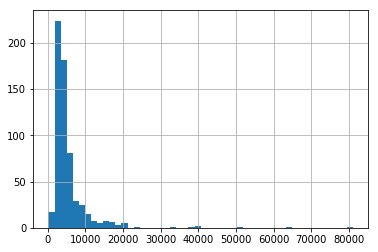

In [5]:
data['ApplicantIncome'].hist(bins = 50)
plt.show()

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


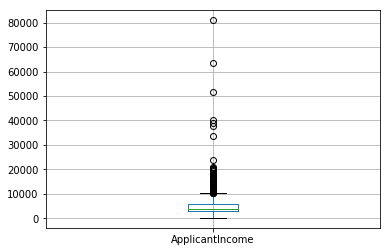

In [7]:
#the distribution of applicants income
data.boxplot(column='ApplicantIncome')

In [8]:
data['Education'].head(10)

0        Graduate
1        Graduate
2        Graduate
3    Not Graduate
4        Graduate
5        Graduate
6    Not Graduate
7        Graduate
8        Graduate
9        Graduate
Name: Education, dtype: object

/home/t1/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


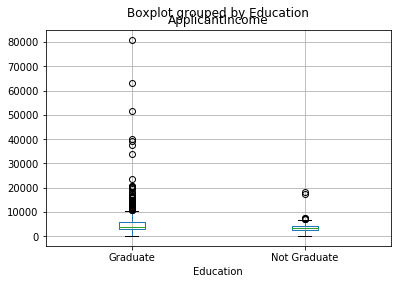

In [9]:
data.boxplot(column = 'ApplicantIncome',by='Education')

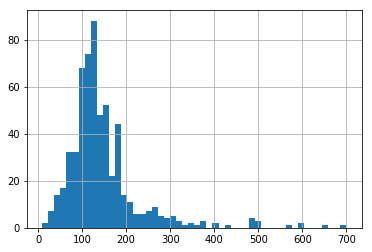

In [10]:
data['LoanAmount'].hist(bins=50)

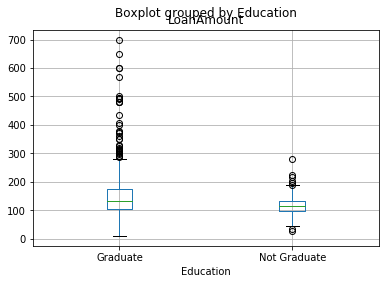

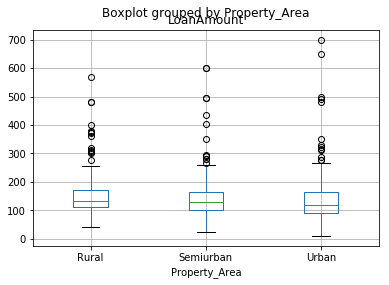

In [11]:
data.boxplot(column='LoanAmount',by='Education')
data.boxplot(column='LoanAmount',by='Property_Area')

In [12]:
#chances of getting a loan based on credit history
temp1 = data['Credit_History'].value_counts(ascending=True)
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print 'Frequency Table for Credit History:' 
print temp1

print '\nProbility of getting loan for each Credit History class:' 
print temp2

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


Text(0.5,1,u'Probability of getting loan by credit history')

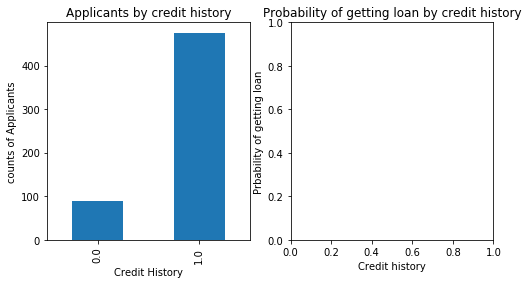

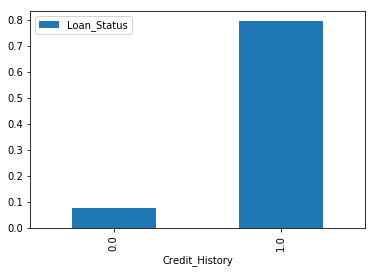

In [13]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit History')
ax1.set_ylabel('counts of Applicants')
ax1.set_title('Applicants by credit history')
temp1.plot(kind = 'bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel('Credit history')
ax2.set_ylabel('Prbability of getting loan')
ax2.set_title('Probability of getting loan by credit history')

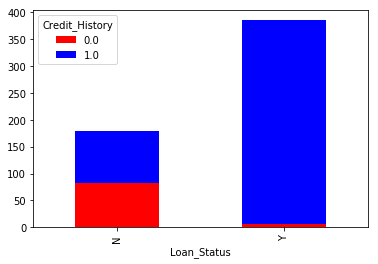

In [14]:
temp3 = pd.crosstab(data['Loan_Status'],data['Credit_History'])
temp3.plot(kind = 'bar',stacked=True,color=['red','blue'],grid = False)

In [15]:
#find out how many values are missing in each feature
data.apply(lambda x : sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

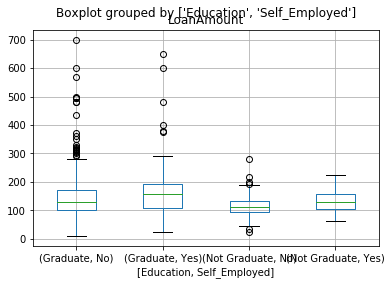

In [16]:
#replace the missing values with the mean of the values
#data['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

#2nd method
data.boxplot(column = 'LoanAmount',by=['Education','Self_Employed'])

In [17]:
print("The no of values missing in  : ")
print("Education : %d" %sum(data['Education'].isnull(),axis=0))
print("Self Employed : %d" %sum(data['Self_Employed'].isnull(),axis=0))

The no of values missing in  : 
Education : 0
Self Employed : 32


In [18]:
print("Category vise splits for Self Employed")
data['Self_Employed'].value_counts()

Category vise splits for Self Employed


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
#Since no of "No" values is much higher than "Yes"
#we replace the missing values with "No"
data['Self_Employed'].fillna('No',inplace=True)
print("NUmber of missing values : %d" %sum(data['Self_Employed'].isnull(),axis=0))

NUmber of missing values : 0


Number of missing values in Loan Amount : 0


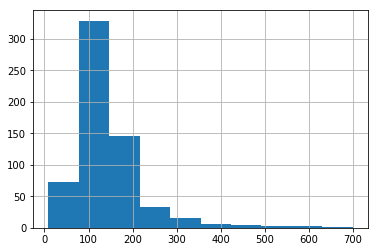

In [20]:
#create an excel style pivot table
table = data.pivot_table(values='LoanAmount',index='Self_Employed',columns='Education',aggfunc= np.median)
#define a functon to return value from this pivot table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

#replace missing values in loan amount column
data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage,axis=1),inplace=True)
data['LoanAmount'].hist()
print("Number of missing values in Loan Amount : %d" %sum(data['LoanAmount'].isnull(),axis=0))

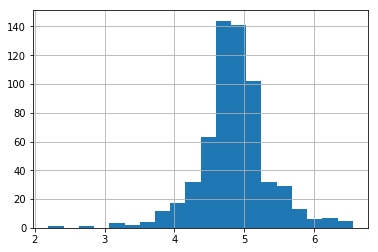

In [21]:
#from above graph we see that distribution of loan amount is non-normal
#taking log of the data
data['LoanAmount_log'] = np.log(data['LoanAmount']) 
data['LoanAmount_log'].hist(bins=20)

data distribution of 'Applicant Income' and 'Coapplicant Income'


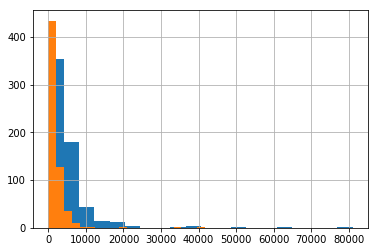

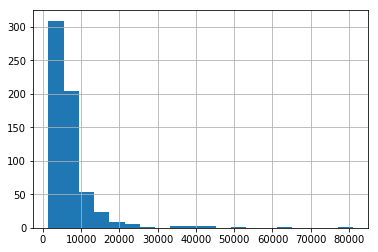

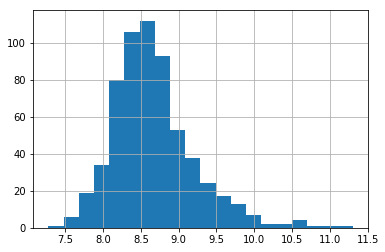

In [22]:
print("data distribution of 'Applicant Income' and 'Coapplicant Income'")
data['ApplicantIncome'].hist(bins=20)
data['CoapplicantIncome'].hist(bins=20)
#total income of applicant and coapplicant
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
fig = plt.figure()
#Data distribution of total income
data['TotalIncome'].hist(bins=20)
data['TotalIncome_log'] = np.log(data['TotalIncome'])
fig = plt.figure()
#data distribution of log(total income)
data['TotalIncome_log'].hist(bins = 20)

In [23]:
#Data for Gender feature
print("Number of missing values : %d" %sum(data['Gender'].isnull(),axis=0))
print("Category wise data distribution of gender")
data['Gender'].value_counts()

Number of missing values : 13
Category wise data distribution of gender


Male      489
Female    112
Name: Gender, dtype: int64

In [24]:
#replacing few beginning values with "male" and rest with "female"
data['Gender'].fillna('Male',limit=8,inplace=True)
data['Gender'].fillna('Female',inplace=True)

In [25]:
print("data distribution for 'Married'")
print(data['Married'].value_counts())
print("Number of missing values : %d" %sum(data['Married'].isnull(),axis=0))
#replace the first 2 values with 'yes' and rest with 'no'   

data['Married'].fillna('Yes',limit=2,inplace=True)
data['Married'].fillna('No',inplace=True)

data distribution for 'Married'
Yes    398
No     213
Name: Married, dtype: int64
Number of missing values : 3


In [26]:
print("Data distribution for 'Dependents'")
print(data['Dependents'].value_counts())
print("Number of missing values %d" %sum(data['Dependents'].isnull(),axis=0))

Data distribution for 'Dependents'
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Number of missing values 15


In [27]:
#replacing the first 8,3,3 values with '0','1','2' respectively and rest with '3+'
data['Dependents'].fillna('0',limit=8,inplace=True)
data['Dependents'].fillna('1',limit=3,inplace=True)
data['Dependents'].fillna('2',limit=3,inplace=True)
data['Dependents'].fillna('3+',inplace=True)
#print(sum(data['Dependents'].isnull(),axis=0))

In [28]:
#data distribution for loan amount term 
print(data['Loan_Amount_Term'].value_counts())
print("Number of missing values : %d" %sum(data['Loan_Amount_Term'].isnull(),axis=0))

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
Number of missing values : 14


In [29]:
#since the values with the term 360 are much higher as compared to the rest
#replace the missing values with 360
data['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [30]:
print("Data distriution for credit history")
print(data['Credit_History'].value_counts())
print("Number of missing values : %d" %sum(data['Credit_History'].isnull(),axis=0))

Data distriution for credit history
1.0    475
0.0     89
Name: Credit_History, dtype: int64
Number of missing values : 50


In [31]:
#fill the missing values in categories by the ratio of number of values in each class
temp=data['Credit_History'].value_counts()
temp1=round(np.float(temp[1])/np.sum(temp)*sum(data['Credit_History'].isnull(),axis=0))
data['Credit_History'].fillna(1.0,limit=np.int(temp1),inplace=True)
data['Credit_History'].fillna(0.0,inplace=True)
#print(sum(data['Credit_History'].isnull(),axis=0))
data['Credit_History'].value_counts()

1.0    517
0.0     97
Name: Credit_History, dtype: int64

In [32]:
#Builiding predictive Models
from sklearn.preprocessing import LabelEncoder
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [33]:
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])
    
data.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [34]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,4.867534,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760,6000.0,8.699515


In [35]:
#import models from scikit learn module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import metrics

In [36]:
#function for making classification and asessing performance
def classification_model(model,data,predictors,outcome):
    #fitting the model
    model.fit(data[predictors],data[outcome])
    #make predictions on training set
    predictions = model.predict(data[predictors])
    #Accuracy on training data
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("accuracy : %f" %accuracy)
    
    #using Cross validation
    kf = KFold(n_splits=5,shuffle=True)
    error = []
    for train,test in kf.split(data):
        #filtering the data
        train_pred = data[predictors].iloc[train,:]
        train_outcome = data[outcome].iloc[train]
        test_pred = data[predictors].iloc[test,:]
        test_outcome = data[outcome].iloc[test]
        
        model.fit(train_pred,train_outcome)
        error.append(model.score(test_pred,test_outcome))
        
    print('Cross validation error : %f' %(np.mean(error)))
        
    model.fit(data[predictors],data[outcome])

In [37]:
#Logistic Regression
model = LogisticRegression()
outcome_var = 'Loan_Status'
predict_var = ['Credit_History']
classification_model(model,data,predict_var,outcome_var)

accuracy : 0.806189
Cross validation error : 0.806184


In [38]:
#different predictor variables
predict_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model,data,predict_var,outcome_var)

accuracy : 0.806189
Cross validation error : 0.806158


In [39]:
#Decision tree classification
model = DecisionTreeClassifier()
predict_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model,data,predict_var,outcome_var)

accuracy : 0.885993
Cross validation error : 0.692150


In [40]:
#random forest classification
model = RandomForestClassifier(n_estimators=100)
predict_var = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','Credit_History',
                'Property_Area','LoanAmount_log','TotalIncome_log']
classification_model(model,data,predict_var,outcome_var)

accuracy : 1.000000
Cross validation error : 0.780155


In [41]:
#create a series with feature importances
featimp = pd.Series(model.feature_importances_,index=predict_var).sort_values(ascending=False)
print featimp

TotalIncome_log     0.276067
Credit_History      0.251385
LoanAmount_log      0.232729
Dependents          0.054651
Property_Area       0.048500
Loan_Amount_Term    0.042230
Education           0.025454
Married             0.025173
Self_Employed       0.021906
Gender              0.021905
dtype: float64


In [42]:
model = RandomForestClassifier(n_estimators=25,min_samples_split=25,max_depth=7,max_features=1)
predict_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model,data,predict_var,outcome_var)

accuracy : 0.827362
Cross validation error : 0.807797
